##### Durability of Immunity against reinfection of SARS-CoV-2

###### Author: Sangeetha Vijayam
###### Reviwer: Jeffrey P. Townsend, Alex Dornburg, Hayley B. Hassler
###### Date: 12/02/2022¶

##### Input Data: updated_OD _filev7.csv contains processed N IgG antibodies converted to IgG antibodies from 
##### the supplementary dataset of Edridge et al. 2020, "Seasonal coronavirus protective immunity is short-lasting", 
##### Nature Medicine. using a linear regression model of N and IgG antibody data from Li et al. 2006, 
##### "Long-Term Persistence of Robust Antibody and Cytotoxic T Cell Responses in Recovered Patients 
##### Infected with SARS Coronavirus", PLoS ONE.

##### 1. Import and get header data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import math

inputFile = "updated_OD_filev7_org.csv"

df2 = pd.read_csv(inputFile)

print(df2)

      Unnamed: 0     X      Date      Virus  OD_value     V4     V5        V6  \
0              1     1   8/20/85       229E  0.614941  False    NaN       NaN   
1              1     2  11/18/85       229E  0.870174  False   90.0  0.002836   
2              1     3   2/14/86       229E  0.709271  False   88.0 -0.001828   
3              1     4   5/29/86       229E  0.617718  False  104.0 -0.000880   
4              1     5    9/5/86       229E  0.698786  False   99.0  0.000819   
...          ...   ...       ...        ...       ...    ...    ...       ...   
3033          10  3034   2/21/86  SOSIP_HIV  0.854123  False   91.0 -0.001696   
3034          10  3035   5/23/86  SOSIP_HIV  0.805457  False   91.0 -0.000535   
3035          10  3036   8/11/86  SOSIP_HIV  0.909822  False   80.0  0.001305   
3036          10  3037  11/13/86  SOSIP_HIV  1.050687  False   94.0  0.001499   
3037          10  3038   2/24/87  SOSIP_HIV  0.981110    NaN  103.0 -0.000676   

            V8        V9  


In [2]:
headers = list(df2.head(0))
print(headers)

['Unnamed: 0', 'X', 'Date', 'Virus', 'OD_value', 'V4', 'V5', 'V6', 'V8', 'V9']


##### Take dataset without headers

In [3]:
noheaderdataset0 = pd.read_csv(inputFile).iloc[0:]
print(noheaderdataset0)

      Unnamed: 0     X      Date      Virus  OD_value     V4     V5        V6  \
0              1     1   8/20/85       229E  0.614941  False    NaN       NaN   
1              1     2  11/18/85       229E  0.870174  False   90.0  0.002836   
2              1     3   2/14/86       229E  0.709271  False   88.0 -0.001828   
3              1     4   5/29/86       229E  0.617718  False  104.0 -0.000880   
4              1     5    9/5/86       229E  0.698786  False   99.0  0.000819   
...          ...   ...       ...        ...       ...    ...    ...       ...   
3033          10  3034   2/21/86  SOSIP_HIV  0.854123  False   91.0 -0.001696   
3034          10  3035   5/23/86  SOSIP_HIV  0.805457  False   91.0 -0.000535   
3035          10  3036   8/11/86  SOSIP_HIV  0.909822  False   80.0  0.001305   
3036          10  3037  11/13/86  SOSIP_HIV  1.050687  False   94.0  0.001499   
3037          10  3038   2/24/87  SOSIP_HIV  0.981110    NaN  103.0 -0.000676   

            V8        V9  


In [4]:
edridgefulldataset = np.transpose(noheaderdataset0) 

In [5]:
print(edridgefulldataset)

                0            1            2            3            4     \
Unnamed: 0         1            1            1            1            1   
X                  1            2            3            4            5   
Date         8/20/85     11/18/85      2/14/86      5/29/86       9/5/86   
Virus           229E         229E         229E         229E         229E   
OD_value    0.614941     0.870174     0.709271     0.617718     0.698786   
V4             False        False        False        False        False   
V5               NaN           90           88          104           99   
V6               NaN   0.00283593  -0.00182845 -0.000880309  0.000818863   
V8          0.149344      0.21133     0.172253     0.150019     0.169707   
V9               NaN  0.000688733 -0.000444057 -0.000213792  0.000198869   

                   5            6           7          8            9     ...  \
Unnamed: 0            1            1           1          1            1  ...   
X

#### SARS-CoV-1

###### SARS-CoV-1 Average peak-normalized OD post-infection (3 mo.)

###### Input Data: Average peak-normalized ELIZA ODs for SARS-CoV-1 S IgG antibodies from Wu et al. 2007, 
###### "Duration of antibody responses after severe acute respiratory syndrome", Emerging Infectious Diseases.

####### days : 90, 180, 365, 730, 1095
####### ODs : 1, 0.96, 0.638, 0.516, 0.249

In [8]:
sarscov1data = [[1, 90, "SARSCoV1", 1, True, "NA", "NA"],
                [2, 180, "SARSCoV1", 0.96, False, (180 - 90), (0.96 - 1)/(180 - 90)],
                [3, 365, "SARSCoV1", 0.638, False, (365 - 180), (0.638 - 0.96) / (365 - 180)], 
                [4, 730, "SARSCoV1", 0.516, False, (730 - 365), (0.516 - 0.638) / (730 - 365)],
                [5, 1095, "SARSCoV1", 0.249,False, (1095 - 730), (0.249 - 0.516) / (1095 - 730)]]

In [9]:
print(sarscov1data)

[[1, 90, 'SARSCoV1', 1, True, 'NA', 'NA'], [2, 180, 'SARSCoV1', 0.96, False, 90, -0.00044444444444444485], [3, 365, 'SARSCoV1', 0.638, False, 185, -0.0017405405405405403], [4, 730, 'SARSCoV1', 0.516, False, 365, -0.00033424657534246574], [5, 1095, 'SARSCoV1', 0.249, False, 365, -0.0007315068493150685]]


##### SARS-CoV-1 Waning of Antibody OD

In [10]:
sarscov1datalength = len(sarscov1data)

In [11]:
print(sarscov1datalength)

5


##### Table/ArrayList creation

In [16]:
for i in range(0,len(sarscov1data)):
    for j in range(0,len(sarscov1data[i])):
        print(sarscov1data[i][j])

1
90
SARSCoV1
1
True
NA
NA
2
180
SARSCoV1
0.96
False
90
-0.00044444444444444485
3
365
SARSCoV1
0.638
False
185
-0.0017405405405405403
4
730
SARSCoV1
0.516
False
365
-0.00033424657534246574
5
1095
SARSCoV1
0.249
False
365
-0.0007315068493150685


In [17]:
aod = 0.25
sarscov1paddedmeanwaning = dict();
sarscov1datalength3 = 5
index = 0

while aod <= 1:       
    index  = 2
    valueList = list()
    
    while index <= sarscov1datalength3:    
        print("aod :" + str(aod))
        if ( (sarscov1data[index-2][3] >= aod and aod >= sarscov1data[index-1][3]) or 
             (sarscov1data[index-2][3] <= aod and aod <= sarscov1data[index-1][3]) ) :
            valueList.append(sarscov1data[index-1][6])
        #else:
         #   valueList.append("None")
        sarscov1paddedmeanwaning["{0:.3f}".format(aod)] = valueList
            
        index = index + 1    
    aod = aod + 0.05

print(len(sarscov1paddedmeanwaning))

aod :0.25
aod :0.25
aod :0.25
aod :0.25
aod :0.3
aod :0.3
aod :0.3
aod :0.3
aod :0.35
aod :0.35
aod :0.35
aod :0.35
aod :0.39999999999999997
aod :0.39999999999999997
aod :0.39999999999999997
aod :0.39999999999999997
aod :0.44999999999999996
aod :0.44999999999999996
aod :0.44999999999999996
aod :0.44999999999999996
aod :0.49999999999999994
aod :0.49999999999999994
aod :0.49999999999999994
aod :0.49999999999999994
aod :0.5499999999999999
aod :0.5499999999999999
aod :0.5499999999999999
aod :0.5499999999999999
aod :0.6
aod :0.6
aod :0.6
aod :0.6
aod :0.65
aod :0.65
aod :0.65
aod :0.65
aod :0.7000000000000001
aod :0.7000000000000001
aod :0.7000000000000001
aod :0.7000000000000001
aod :0.7500000000000001
aod :0.7500000000000001
aod :0.7500000000000001
aod :0.7500000000000001
aod :0.8000000000000002
aod :0.8000000000000002
aod :0.8000000000000002
aod :0.8000000000000002
aod :0.8500000000000002
aod :0.8500000000000002
aod :0.8500000000000002
aod :0.8500000000000002
aod :0.9000000000000002
aod 

In [18]:
for key in sarscov1paddedmeanwaning:
    print(str(key) + " " + str(sarscov1paddedmeanwaning[key]))

0.250 [-0.0007315068493150685]
0.300 [-0.0007315068493150685]
0.350 [-0.0007315068493150685]
0.400 [-0.0007315068493150685]
0.450 [-0.0007315068493150685]
0.500 [-0.0007315068493150685]
0.550 [-0.00033424657534246574]
0.600 [-0.00033424657534246574]
0.650 [-0.0017405405405405403]
0.700 [-0.0017405405405405403]
0.750 [-0.0017405405405405403]
0.800 [-0.0017405405405405403]
0.850 [-0.0017405405405405403]
0.900 [-0.0017405405405405403]
0.950 [-0.0017405405405405403]


In [19]:
import numpy as np

aodList = list(sarscov1paddedmeanwaning.keys())
print(aodList)

arraod = np.array(aodList)
arraod = arraod.astype(float)

['0.250', '0.300', '0.350', '0.400', '0.450', '0.500', '0.550', '0.600', '0.650', '0.700', '0.750', '0.800', '0.850', '0.900', '0.950']


In [20]:
covdataList = list(sarscov1paddedmeanwaning.values())
print(covdataList)

arrcov = np.array(covdataList).squeeze()

[[-0.0007315068493150685], [-0.0007315068493150685], [-0.0007315068493150685], [-0.0007315068493150685], [-0.0007315068493150685], [-0.0007315068493150685], [-0.00033424657534246574], [-0.00033424657534246574], [-0.0017405405405405403], [-0.0017405405405405403], [-0.0017405405405405403], [-0.0017405405405405403], [-0.0017405405405405403], [-0.0017405405405405403], [-0.0017405405405405403]]


In [21]:
from scipy.interpolate import interp1d
print(len(aodList))
print(len(covdataList))

y_interpolation = interp1d(arraod, arrcov)

15
15


In [22]:
interpolate_x_new = 0.250


print("Value of Y at x = {} is".format(interpolate_x_new),
      y_interpolation(interpolate_x_new))

Value of Y at x = 0.25 is -0.0007315068493150685


In [23]:
sarscov1antibodytimecourse = list()

sarscov1antibodytimecourse.append(1.0)

In [24]:
print(str(sarscov1antibodytimecourse))

[1.0]


In [25]:
print(sarscov1antibodytimecourse[0])

1.0


##### Populating a dictionary for the interpolate values

In [26]:
day = 0
print("Populating a dictionary for the interpolate values")

while sarscov1antibodytimecourse[day] >= 0.925:
    print("For day : " +  str(day))
    print("sarscov1antibodytimecourse[day] : " + str(sarscov1antibodytimecourse[day]))
    print("sarscov1paddedmeanwaning : " + str(sarscov1paddedmeanwaning))
    print("inerpolate of sarscov1paddedmeanwaning")
    #print(y_interpolation(sarscov1antibodytimecourse[day]))
    print("Added value")
    #Not worling
    #sarscov1antibodytimecourse.append(sarscov1antibodytimecourse[day] + y_interpolation(sarscov1antibodytimecourse[day]))    
    sarscov1antibodytimecourse.append(sarscov1antibodytimecourse[day] + y_interpolation(0.250))    
    day = day + 1

Populating a dictionary for the interpolate values
For day : 0
sarscov1antibodytimecourse[day] : 1.0
sarscov1paddedmeanwaning : {'0.250': [-0.0007315068493150685], '0.300': [-0.0007315068493150685], '0.350': [-0.0007315068493150685], '0.400': [-0.0007315068493150685], '0.450': [-0.0007315068493150685], '0.500': [-0.0007315068493150685], '0.550': [-0.00033424657534246574], '0.600': [-0.00033424657534246574], '0.650': [-0.0017405405405405403], '0.700': [-0.0017405405405405403], '0.750': [-0.0017405405405405403], '0.800': [-0.0017405405405405403], '0.850': [-0.0017405405405405403], '0.900': [-0.0017405405405405403], '0.950': [-0.0017405405405405403]}
inerpolate of sarscov1paddedmeanwaning
Added value
For day : 1
sarscov1antibodytimecourse[day] : 0.9992684931506849
sarscov1paddedmeanwaning : {'0.250': [-0.0007315068493150685], '0.300': [-0.0007315068493150685], '0.350': [-0.0007315068493150685], '0.400': [-0.0007315068493150685], '0.450': [-0.0007315068493150685], '0.500': [-0.000731506849

In [27]:
print(sarscov1antibodytimecourse)

[1.0, 0.9992684931506849, 0.9985369863013698, 0.9978054794520547, 0.9970739726027396, 0.9963424657534244, 0.9956109589041093, 0.9948794520547942, 0.9941479452054791, 0.993416438356164, 0.9926849315068489, 0.9919534246575338, 0.9912219178082187, 0.9904904109589036, 0.9897589041095884, 0.9890273972602733, 0.9882958904109582, 0.9875643835616431, 0.986832876712328, 0.9861013698630129, 0.9853698630136978, 0.9846383561643827, 0.9839068493150676, 0.9831753424657524, 0.9824438356164373, 0.9817123287671222, 0.9809808219178071, 0.980249315068492, 0.9795178082191769, 0.9787863013698618, 0.9780547945205467, 0.9773232876712316, 0.9765917808219164, 0.9758602739726013, 0.9751287671232862, 0.9743972602739711, 0.973665753424656, 0.9729342465753409, 0.9722027397260258, 0.9714712328767107, 0.9707397260273956, 0.9700082191780804, 0.9692767123287653, 0.9685452054794502, 0.9678136986301351, 0.96708219178082, 0.9663506849315049, 0.9656191780821898, 0.9648876712328747, 0.9641561643835596, 0.9634246575342444, 

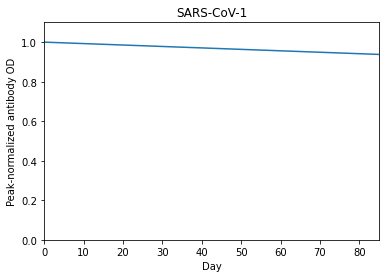

In [28]:
from matplotlib import pyplot as plt
plt.plot(sarscov1antibodytimecourse)
plt.ylim(0,1.1)
#####Added x limit
plt.xlim(0,85)
plt.xlabel("Day")
plt.ylabel("Peak-normalized antibody OD")
plt.title('SARS-CoV-1')
plt.show()

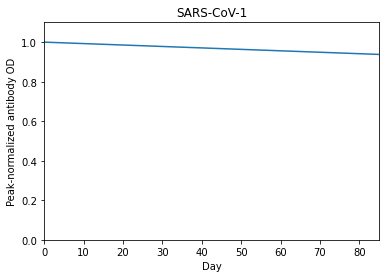

In [29]:
import matplotlib.pyplot as plt
import math

f = plt.figure()
plt.plot(sarscov1antibodytimecourse)
plt.ylim(0,1.1)
#####Added x limit
plt.xlim(0,85)
plt.xlabel("Day")
plt.ylabel("Peak-normalized antibody OD")
plt.title('SARS-CoV-1')
plt.show()

f.savefig("SARS-CoV-1_AntibodyTimecourse" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')

###### Export to Excel

In [32]:
from datetime import datetime

df3 = pd.DataFrame(sarscov1antibodytimecourse, columns=["Antibody Time Course"])
df3.to_csv('SARS-CoV-1-Antibody-Time-Course' + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + '.csv', index=False)

In [33]:
sarscov1baseline = 0.1301183

In [34]:
print(sarscov1baseline)

0.1301183


##### This baseline peak-normalized S IgG antibody level for SARS-CoV-1 
##### comes from the ancestral and descendent states analysis that used 
##### the baselines for the human "seasonal" coronaviruses to estimate the baselines for the zoonotic coronaviruses.

In [35]:
import math

def calculatelambda(sarscov1baseline, lambdaValue, index):
    exponentValue = -lambdaValue * index
    result = sarscov1baseline + (1 - sarscov1baseline) * math.exp(exponentValue)
    return result

In [36]:
sarscov1lsfuncwfixedbaseline = 0
currentMinValue = float('inf')
currentMinValue

for index in range(0, (len(sarscov1antibodytimecourse))):
    print(sarscov1antibodytimecourse[index] )
    ##Need to find the step value and maximum value for this lambdaValue
    lambdaValue = 0.002
    
    ##Added 11/28
    sarscov1lsfuncwfixedbaseline = (sarscov1antibodytimecourse[index]) - math.pow((calculatelambda(sarscov1baseline, lambdaValue, index)), 2)     
    print(sarscov1lsfuncwfixedbaseline)
    
    if sarscov1lsfuncwfixedbaseline < currentMinValue:
        currentMinValue = sarscov1lsfuncwfixedbaseline      

1.0
0.0
0.9992684931506849
0.002741522012219111
0.9985369863013698
0.00547008154197226
0.9978054794520547
0.008185728533658954
0.9970739726027396
0.010888512735899969
0.9963424657534244
0.013578483702312516
0.9956109589041093
0.016255690792281174
0.9948794520547942
0.018920183171725613
0.9941479452054791
0.021572009813866755
0.993416438356164
0.0242112194999885
0.9926849315068489
0.0268378608201969
0.9919534246575338
0.029451982174175106
0.9912219178082187
0.03205363177193843
0.9904904109589036
0.034642857634582525
0.9897589041095884
0.03721970759503268
0.9890273972602733
0.03978422929878522
0.9882958904109582
0.04233647020465059
0.9875643835616431
0.044876477585491514
0.986832876712328
0.047404298528957334
0.9861013698630129
0.049919979938217396
0.9853698630136978
0.05242356853268937
0.9846383561643827
0.0549151108487671
0.9839068493150676
0.05739465324054338
0.9831753424657524
0.05986224188053135
0.9824438356164373
0.06231792276038217
0.9817123287671222
0.0647617416915992
0.980980821

In [37]:
print(currentMinValue)

0.0


##### This value of lambda goes into the ancestral and descendent states 
##### analysis estimating a and b for the zoonotic coronaviruses.

In [38]:
sarscov1halflife = np.log(2) / 0.0017578418303445613 

In [39]:
print(sarscov1halflife)

394.31714992473405


##### Added as part of python code

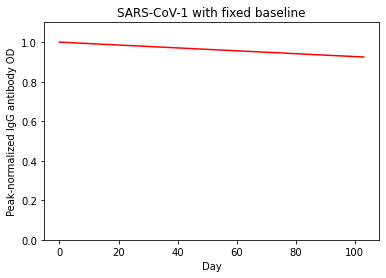

In [40]:
plt.plot(sarscov1antibodytimecourse, color='red')
plt.ylim(0,1.1)
plt.xlabel("Day")
plt.ylabel("Peak-normalized IgG antibody OD")
plt.title('SARS-CoV-1 with fixed baseline')
plt.show()

##### Added as part of python code

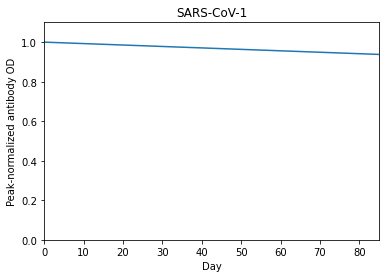

In [41]:
f2 = plt.figure()
plt.plot(sarscov1antibodytimecourse)
plt.ylim(0,1.1)
#####Added x limit
plt.xlim(0,85)
plt.xlabel("Day")
plt.ylabel("Peak-normalized antibody OD")
plt.title('SARS-CoV-1')
plt.show()

f2.savefig("SARS-CoV-1_withFixedBaseline" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')

In [43]:
lambdaForPlot = 0.00175784
result = 0
plotBaseLines = list()

for days in range(0, len(sarscov1antibodytimecourse)):
    exponentValue = -lambdaForPlot * days
    result = sarscov1baseline + (1 - sarscov1baseline) * math.exp(exponentValue)
    plotBaseLines.append(result)

In [44]:
print(plotBaseLines)

[1.0, 0.9984722303331884, 0.9969471438819851, 0.9954247359338696, 0.9939050017845978, 0.9923879367381878, 0.9908735361069051, 0.9893617952112485, 0.9878527093799349, 0.9863462739498859, 0.9848424842662126, 0.9833413356822014, 0.9818428235593, 0.9803469432671023, 0.9788536901833348, 0.9773630596938423, 0.975875047192573, 0.9743896480815651, 0.9729068577709319, 0.971426671678848, 0.969949085231535, 0.9684740938632475, 0.9670016930162587, 0.9655318781408468, 0.9640646446952804, 0.962599988145805, 0.9611379039666283, 0.9596783876399071, 0.9582214346557326, 0.9567670405121168, 0.9553152007149783, 0.9538659107781291, 0.95241916622326, 0.9509749625799269, 0.9495332953855372, 0.9480941601853364, 0.9466575525323931, 0.9452234679875867, 0.9437919021195924, 0.9423628505048687, 0.9409363087276427, 0.9395122723798972, 0.9380907370613566, 0.9366716983794736, 0.9352551519494153, 0.9338410933940503, 0.9324295183439343, 0.9310204224372972, 0.9296138013200295, 0.9282096506456687, 0.9268079660753862, 0.9

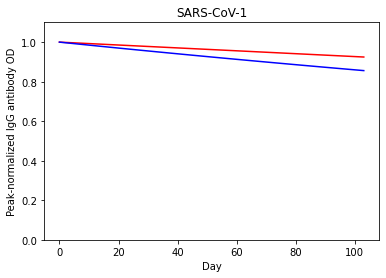

In [45]:
from matplotlib import pyplot as plt

plt.plot(sarscov1antibodytimecourse, color='red')
plt.ylim(0,1.1)
plt.xlabel("Day")

plt.plot(plotBaseLines, color = 'blue')

plt.ylabel("Peak-normalized IgG antibody OD")
plt.title('SARS-CoV-1 with fixed baseline')
#plt.show()

plt.title('SARS-CoV-1')
plt.show()

##### Added as part of python code

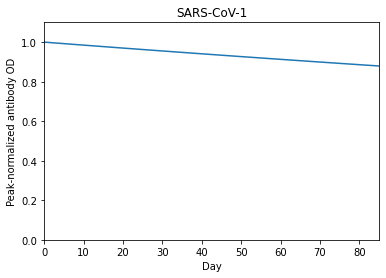

In [46]:
f2 = plt.figure()
plt.plot(plotBaseLines)
plt.ylim(0,1.1)
#####Added x limit
plt.xlim(0,85)
plt.xlabel("Day")
plt.ylabel("Peak-normalized antibody OD")
plt.title('SARS-CoV-1')
plt.show()

f2.savefig("SARS-CoV-2_withFixedBaseline" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')

In [47]:
print(len(sarscov1antibodytimecourse))

104


In [48]:
sarscov1antibodytimecourseplusexp = sarscov1antibodytimecourse
day = len(sarscov1antibodytimecourse)

print(day)

104


In [49]:
print(len(sarscov1antibodytimecourseplusexp))

104


In [50]:
#while day < 4393:
#Small file 86 records
#while day < 89:
maxDays = 90
while day < maxDays:
    day = day + 1
    print("day : " + str(day))
    exponentValueBaseLine = -0.0017578418303445613
    tempValue = sarscov1baseline + (sarscov1antibodytimecourseplusexp[day-1] - sarscov1baseline) * math.exp(exponentValueBaseLine)
    print('tempValue' + str(tempValue))
    sarscov1antibodytimecourseplusexp.append(tempValue)

In [51]:
print(sarscov1antibodytimecourseplusexp)

[1.0, 0.9992684931506849, 0.9985369863013698, 0.9978054794520547, 0.9970739726027396, 0.9963424657534244, 0.9956109589041093, 0.9948794520547942, 0.9941479452054791, 0.993416438356164, 0.9926849315068489, 0.9919534246575338, 0.9912219178082187, 0.9904904109589036, 0.9897589041095884, 0.9890273972602733, 0.9882958904109582, 0.9875643835616431, 0.986832876712328, 0.9861013698630129, 0.9853698630136978, 0.9846383561643827, 0.9839068493150676, 0.9831753424657524, 0.9824438356164373, 0.9817123287671222, 0.9809808219178071, 0.980249315068492, 0.9795178082191769, 0.9787863013698618, 0.9780547945205467, 0.9773232876712316, 0.9765917808219164, 0.9758602739726013, 0.9751287671232862, 0.9743972602739711, 0.973665753424656, 0.9729342465753409, 0.9722027397260258, 0.9714712328767107, 0.9707397260273956, 0.9700082191780804, 0.9692767123287653, 0.9685452054794502, 0.9678136986301351, 0.96708219178082, 0.9663506849315049, 0.9656191780821898, 0.9648876712328747, 0.9641561643835596, 0.9634246575342444, 

In [52]:
print(len(sarscov1antibodytimecourseplusexp))

104


Text(0.5, 1.0, 'SARS-CoV-1')

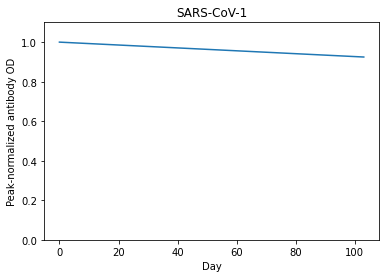

In [53]:
import matplotlib.pyplot as plt2
plt2.plot(sarscov1antibodytimecourseplusexp)
plt2.ylim(0,1.1)
plt2.xlabel("Day")
plt2.ylabel("Peak-normalized antibody OD")
plt2.title('SARS-CoV-1')

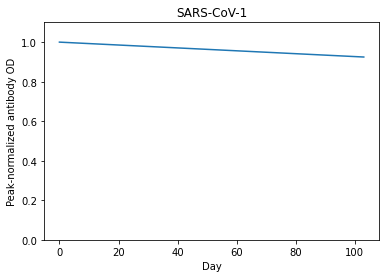

In [54]:
import matplotlib.pyplot as plt3

f = plt3.figure()
plt3.plot(sarscov1antibodytimecourseplusexp)

plt3.ylim(0,1.1)
plt3.xlabel("Day")
plt3.ylabel("Peak-normalized antibody OD")
plt3.title('SARS-CoV-1')
plt3.show()

f.savefig("SARS-CoV-1_nOD-by-Day_" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')

##### SARS-CoV-1 Probability of Infection | Antibody OD

###### These values for a and b come from the ancestral and descendent states analysis to determine them 
###### for the zoonotic coronaviruses given baselines and declines for all viruses, and a's and b's for the 
###### seasonal coronaviruses.

In [55]:
import math

def sarscov1probinfgivenaod(aod):
    exponentValue = 5.092227 + (12.36962 * aod)
    result = 1 / (1 + math.exp(exponentValue))
    return result

In [56]:
sarscov1probinfgivenaodList = list()

currentValue = 0;

while( currentValue <= 1):
    currentValue = currentValue + 0.00625
    sarscov1probinfgivenaodList.append(sarscov1probinfgivenaod(currentValue))

print(sarscov1probinfgivenaodList)

[0.00565503932959295, 0.005236523098320683, 0.004848829235346531, 0.004489709321835508, 0.004157075879124939, 0.0038489912895753597, 0.0035636574162885362, 0.0032994058871032464, 0.003054689008473475, 0.002828071275330746, 0.002618221443769625, 0.00242390513431859, 0.002243977934622568, 0.0020773789715301206, 0.0019231249238157039, 0.001780304448049583, 0.001648072991432803, 0.0015256479667247575, 0.0014123042656918035, 0.0013073700887859944, 0.0012102230700140532, 0.0011202866771716496, 0.0010370268687915516, 0.0009599489902826114, 0.0008885948928174303, 0.0008225402595582911, 0.0007613921247928778, 0.0007047865724834108, 0.0006523866016154988, 0.0006038801465671988, 0.0005589782415056025, 0.000517413318559291, 0.0004789376302117146, 0.0004433217870148398, 0.00041035340233601815, 0.0003798358364258947, 0.0003515870326332019, 0.000325438439095351, 0.0003012340097037458, 0.00027882927858153487, 0.00025809050272086395, 0.00023889386780835938, 0.00022112475262318215, 0.0002046770477232051

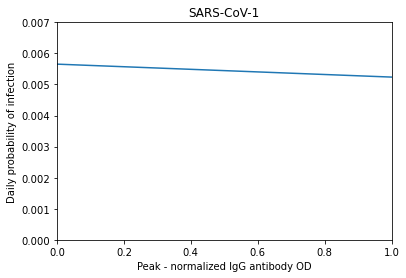

In [57]:
plt.plot(sarscov1probinfgivenaodList)
plt.ylim(0,0.007)
plt.xlim(0.0, 1.0)
plt.xlabel("Peak - normalized IgG antibody OD")
plt.ylabel("Daily probability of infection")
plt.title('SARS-CoV-1')
plt.show()

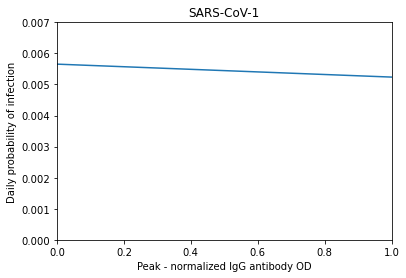

In [60]:
import matplotlib.pyplot as plt4

f2 = plt4.figure()
plt4.plot(sarscov1probinfgivenaodList)

plt4.ylim(0,0.007)
plt4.xlim(0.0, 1.0)
plt4.xlabel("Peak - normalized IgG antibody OD")
plt4.ylabel("Daily probability of infection")
plt4.title('SARS-CoV-1')
plt4.show()

f2.savefig("SARS-CoV-1_PrInf-by-nOD" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')

In [61]:
import math

def sarscov1probinfgivenall(a, b, aod):
    exponentValue = (-a) + (-b) * aod
    result = 1 / (1 + math.exp(exponentValue))
    return result

In [62]:
def populatesarscov1probinfList(a, b):
    sarscov1probinfList = list()
    
    x = 0;

    while( x <= 1):
        x = x + 0.05
        sarscov1probinfList.append(sarscov1probinfgivenall(a, b, x))
    
    return sarscov1probinfList  

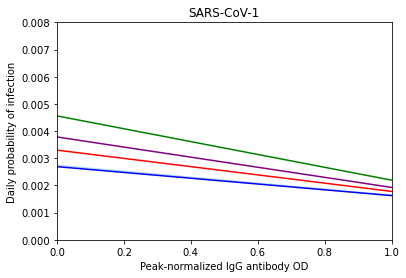

In [63]:
from matplotlib import pyplot as plt

sarscov1probinfList1 = populatesarscov1probinfList(-5.092227, -12.36962)

plt.plot(sarscov1probinfList1, color='red')
plt.ylim(0,0.008)
plt.xlim(0.0, 1.0)
plt.xlabel("Peak-normalized IgG antibody OD")

sarscov1probinfList2 = populatesarscov1probinfList(-4.651824, -14.68369)
sarscov1probinfList3 = populatesarscov1probinfList(-5.385595, -10.244631)
sarscov1probinfList4 = populatesarscov1probinfList(-4.896457, -13.53845)
sarscov1probinfList5 = populatesarscov1probinfList(-5.409852, -10.1041)

plt.plot(sarscov1probinfList2, color = 'green')
plt.plot(sarscov1probinfList3, color = 'lightblue')
plt.plot(sarscov1probinfList4, color = 'purple')
plt.plot(sarscov1probinfList5, color = 'blue')

plt.ylabel("Daily probability of infection")
plt.title('SARS-CoV-1')
#plt.show()

plt.title('SARS-CoV-1')
plt.show()

###### The alternate values for a and b above come from our results using different approaches toward building the 
###### molecular evolutionary tree of the coronaviruses and toward building the time tree of the coronaviruses (see Supplement).

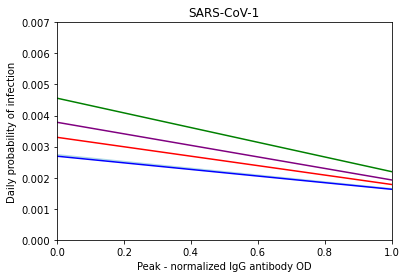

In [64]:
import matplotlib.pyplot as plt5

f5 = plt5.figure()
plt5.plot(sarscov1probinfList1, color='red')
plt5.plot(sarscov1probinfList2, color = 'green')
plt5.plot(sarscov1probinfList3, color = 'lightblue')
plt5.plot(sarscov1probinfList4, color = 'purple')
plt5.plot(sarscov1probinfList5, color = 'blue')

plt5.ylim(0,0.007)
plt5.xlim(0.0, 1.0)

plt5.xlabel("Peak - normalized IgG antibody OD")
plt5.ylabel("Daily probability of infection")
plt5.title('SARS-CoV-1')
plt5.show()

f5.savefig("SARS-CoV-1_PrInfs-by-nOD.pdf", bbox_inches='tight')

In [65]:
print(sarscov1antibodytimecourse)

[1.0, 0.9992684931506849, 0.9985369863013698, 0.9978054794520547, 0.9970739726027396, 0.9963424657534244, 0.9956109589041093, 0.9948794520547942, 0.9941479452054791, 0.993416438356164, 0.9926849315068489, 0.9919534246575338, 0.9912219178082187, 0.9904904109589036, 0.9897589041095884, 0.9890273972602733, 0.9882958904109582, 0.9875643835616431, 0.986832876712328, 0.9861013698630129, 0.9853698630136978, 0.9846383561643827, 0.9839068493150676, 0.9831753424657524, 0.9824438356164373, 0.9817123287671222, 0.9809808219178071, 0.980249315068492, 0.9795178082191769, 0.9787863013698618, 0.9780547945205467, 0.9773232876712316, 0.9765917808219164, 0.9758602739726013, 0.9751287671232862, 0.9743972602739711, 0.973665753424656, 0.9729342465753409, 0.9722027397260258, 0.9714712328767107, 0.9707397260273956, 0.9700082191780804, 0.9692767123287653, 0.9685452054794502, 0.9678136986301351, 0.96708219178082, 0.9663506849315049, 0.9656191780821898, 0.9648876712328747, 0.9641561643835596, 0.9634246575342444, 

In [66]:
sarscov1antibodytimecourseplusexp = sarscov1antibodytimecourse
day = len(sarscov1antibodytimecourse)

print(day)

104


In [65]:
#while day < 4393:
#Small file 86 records
#while day < 88:
maxDays = 86
while day < maxDays:
    day = day + 1
    print("day")
    print(day)
    exponentValueBaseLine = -0.003746311184177791
    tempValue = sarscov1baseline + (sarscov1antibodytimecourseplusexp[day-1] - sarscov1baseline) * math.exp(exponentValueBaseLine)
    print('tempValue')
    print(tempValue)
    sarscov1antibodytimecourseplusexp.append(tempValue)

##### SARS-CoV-2 Probability of No Reinfection Time Course

In [67]:
sarscov1probinfgivenaodList = list()

currentValue = 0;

while( currentValue <= 1):
    currentValue = currentValue + 0.00625
    sarscov1probinfgivenaodList.append(sarscov1probinfgivenaod(currentValue))

In [68]:
sarscov1probnoreinfectiontimecourse = list()

day = 0
sarscov1probnoreinfectiontimecourse.append(1.0)

sarscov1probnoreinfectiontimecourse.append(sarscov1probnoreinfectiontimecourse[day] * (1-sarscov1probinfgivenaod(sarscov1antibodytimecourseplusexp[day+1])))

In [69]:
print(sarscov1probnoreinfectiontimecourse)

[1.0, 0.9999999736763632]


In [70]:
print(len(sarscov1antibodytimecourse))

104


In [71]:
#### Need to change days to 4393
while day < 85:
    
    if(day < len(sarscov1antibodytimecourse)):
        sarscov1probnoreinfectiontimecourse.append(sarscov1probnoreinfectiontimecourse[day] * (1 - sarscov1probinfgivenaod(sarscov1antibodytimecourseplusexp[day + 1])))
    else:
        #sarscov1probnoreinfectiontimecourse.append(sarscov1probnoreinfectiontimecourse[day] * (1 - sarscov1probinfgivenaod(sarscov1antibodytimecourseplusexp[1392])))
        sarscov1probnoreinfectiontimecourse.append(sarscov1probnoreinfectiontimecourse[day] * (1 - sarscov1probinfgivenaod(sarscov1antibodytimecourseplusexp[42])))
            
    day = day + 1   

In [72]:
print(sarscov1probnoreinfectiontimecourse)

[1.0, 0.9999999736763632, 0.9999999736763632, 0.9999999471134577, 0.9999999468720137, 0.9999999200654702, 0.9999999195781728, 0.9999998925235422, 0.9999998917859018, 0.9999998644786534, 0.9999998634860985, 0.9999998359216191, 0.9999998346694944, 0.9999998068430866, 0.999999805326652, 0.9999997772335327, 0.9999997754479614, 0.9999997470832599, 0.9999997450236371, 0.9999997163823938, 0.9999997140437149, 0.9999996851208798, 0.9999996824980487, 0.9999996532884794, 0.9999996503763072, 0.9999996208747675, 0.9999996176679703, 0.9999995878691283, 0.9999995843623258, 0.9999995542607524, 0.9999995504484659, 0.9999995200386327, 0.9999995159152836, 0.9999994851915613, 0.999999480751469, 0.9999994497081257, 0.999999444945506, 0.9999994135767047, 0.9999994084856678, 0.9999993767854651, 0.9999993713600137, 0.9999993393223577, 0.9999993335563847, 0.999999301175113, 0.9999992950624, 0.9999992623312377, 0.9999992558654527, 0.9999992227780101, 0.9999992159527054, 0.9999991825024763, 0.9999991753110864, 0

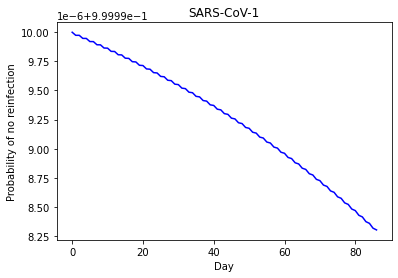

In [73]:
plt.plot(sarscov1probnoreinfectiontimecourse, color='blue')
#Limit not working
#plt.ylim(0,1.1)
plt.xlabel("Day")
plt.ylabel("Probability of no reinfection")
plt.title('SARS-CoV-1')
plt.show()

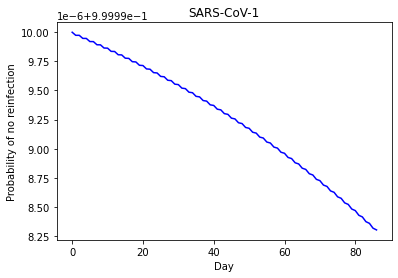

In [73]:
import matplotlib.pyplot as plt15

f15 = plt15.figure()
plt15.plot(sarscov1probnoreinfectiontimecourse, color = 'blue')

#plt6.ylim(0,0.007)
#plt6.xlim(0.0, 1.0)

plt15.xlabel("Day")
plt15.ylabel("Probability of no reinfection")
plt15.title('SARS-CoV-1')
plt15.show()

f15.savefig("SARS-CoV-1_PnorInfTimecourse-by-" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')

In [74]:
sarscov1probreinfection = list()
day = 0;

In [75]:
#while day < 4393:
while day < 85:
    day = day + 1  
        
    #if day < 1392:
    if day < 42:
        tempValue = sarscov1probinfgivenaod(sarscov1antibodytimecourseplusexp[day]) * sarscov1probnoreinfectiontimecourse[day]
    else:       
        #empValue = sarscov1probinfgivenaod(sarscov1antibodytimecourseplusexp[1392])  * sarscov1probnoreinfectiontimecourse[day]
        tempValue = sarscov1probinfgivenaod(sarscov1antibodytimecourseplusexp[43])  * sarscov1probnoreinfectiontimecourse[day]
    
    sarscov1probreinfection.append(tempValue)      

In [76]:
print(sarscov1probreinfection)

[2.6323636085289995e-08, 2.6562905370273472e-08, 2.680434878676941e-08, 2.7047987514065888e-08, 2.729384007589477e-08, 2.754192803830865e-08, 2.7792270263309107e-08, 2.8044888710776257e-08, 2.8299802587158334e-08, 2.855703425335491e-08, 2.8816603266551165e-08, 2.907853239598867e-08, 2.934284155599471e-08, 2.9609553931609877e-08, 2.987868980082506e-08, 3.0150272772073075e-08, 3.0424323493649043e-08, 3.0700866005109854e-08, 3.097992133181724e-08, 3.126151395232467e-08, 3.1545665275946366e-08, 3.183240022824869e-08, 3.212174060950994e-08, 3.2413711800472677e-08, 3.270833599951806e-08, 3.300563905087721e-08, 3.330564355830418e-08, 3.360837583798217e-08, 3.391385890644087e-08, 3.4222119560433594e-08, 3.4533181236803675e-08, 3.484707122165049e-08, 3.516381337980604e-08, 3.548343549565204e-08, 3.5805961869824295e-08, 3.6131420794086284e-08, 3.645983701283625e-08, 3.679123933448402e-08, 3.712565295529419e-08, 3.746310720975779e-08, 3.780362775425688e-08, 3.849398469528572e-08, 3.84939834488007

Text(0.5, 1.0, 'SARS-CoV-1')

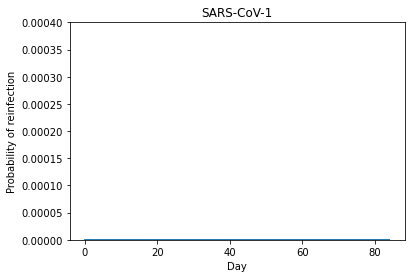

In [77]:
import matplotlib.pyplot as plt17
plt17.plot(sarscov1probreinfection)
plt17.ylim(0, 0.0004)
plt17.xlabel("Day")
plt17.ylabel("Probability of reinfection")
plt17.title('SARS-CoV-1') 

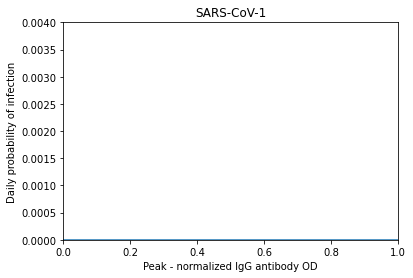

In [78]:
import matplotlib.pyplot as plt17

f17 = plt17.figure()
plt17.plot(sarscov1probreinfection)

plt17.ylim(0,0.004)
plt17.xlim(0.0, 1.0)
plt17.xlabel("Peak - normalized IgG antibody OD")
plt17.ylabel("Daily probability of infection")
plt17.title('SARS-CoV-1')
plt17.show()

f17.savefig("SARS-CoV-1_PrInf-by-nOD" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')

##### SARS-CoV-2

##### Input Data: Average peak-normalized ELIZA ODs for SARS-CoV-2 N IgG antibodies converted to IgG antibodies from from 
##### Gudbjartsson et al. 2020, "Humoral Immune Response to SARS-CoV-2 in Iceland", New England Journal of Medicine. using a 
##### linear regression model of N and IgG antibody data from Li et al. 2006, "Long-Term Persistence of Robust Antibody and 
##### Cytotoxic T Cell Responses in Recovered Patients Infected with SARS Coronavirus", PLoS ONE. 

In [78]:
sarscov2data = [[1, 35, "SARSCoV2", 0.3500076/0.3500076, True, "NA", "NA"],
                [2, 48, "SARSCoV2", 0.3397884/0.3500076, False, (48 - 35), (0.3397884 - 0.3500076 / 0.3500076)/(48 - 35)],
                [3, 70, "SARSCoV2", 0.3380852/0.3500076, False, (70 - 48), (0.3380852 - 0.3397884 / 0.3500076)/(70 - 48)], 
                [4, 94, "SARSCoV2", 0.29806/0.3500076, False, (95 - 70), (0.29806 - 0.3380852 / 0.3500076)/(94 - 70)]]        


In [79]:
print(sarscov2data)

[[1, 35, 'SARSCoV2', 1.0, True, 'NA', 'NA'], [2, 48, 'SARSCoV2', 0.9708029197080292, False, 13, -0.05078550769230769], [3, 70, 'SARSCoV2', 0.9659367396593674, False, 22, -0.028759896350364966], [4, 94, 'SARSCoV2', 0.8515815085158152, False, 25, -0.027828197485806977]]


In [80]:
## SARS-CoV-2 Waning of Antibody OD

sarscov2datalength = len(sarscov2data)

In [81]:
for i in range(0,len(sarscov2data)):
    for j in range(0,len(sarscov2data[i])):
        print(sarscov2data[i][j])

1
35
SARSCoV2
1.0
True
NA
NA
2
48
SARSCoV2
0.9708029197080292
False
13
-0.05078550769230769
3
70
SARSCoV2
0.9659367396593674
False
22
-0.028759896350364966
4
94
SARSCoV2
0.8515815085158152
False
25
-0.027828197485806977


In [82]:
aod = 0.84
sarscov2paddedmeanwaning = dict();
sarscov2datalength = 4
index = 0

while aod <= 1:        
    index  = 2
    valueList = list()    
    
    while index <= sarscov2datalength:    
        print("aod :" + str(aod))
        if ( (sarscov2data[index-2][3] >= aod and aod >= sarscov2data[index-1][3]) or 
             (sarscov2data[index-2][3] <= aod and aod <= sarscov2data[index-1][3]) ) :
            valueList.append(sarscov2data[index-1][6])
        #else:
         #   valueList.append("None")
        if (len(valueList) != 0 ):
            sarscov2paddedmeanwaning["{0:.3f}".format(aod)] = valueList            
        index = index + 1    
    aod = aod + 0.02

print(len(sarscov2paddedmeanwaning))

aod :0.84
aod :0.84
aod :0.84
aod :0.86
aod :0.86
aod :0.86
aod :0.88
aod :0.88
aod :0.88
aod :0.9
aod :0.9
aod :0.9
aod :0.92
aod :0.92
aod :0.92
aod :0.9400000000000001
aod :0.9400000000000001
aod :0.9400000000000001
aod :0.9600000000000001
aod :0.9600000000000001
aod :0.9600000000000001
aod :0.9800000000000001
aod :0.9800000000000001
aod :0.9800000000000001
aod :1.0
aod :1.0
aod :1.0
8


In [83]:
print(sarscov2paddedmeanwaning)

{'0.860': [-0.027828197485806977], '0.880': [-0.027828197485806977], '0.900': [-0.027828197485806977], '0.920': [-0.027828197485806977], '0.940': [-0.027828197485806977], '0.960': [-0.027828197485806977], '0.980': [-0.05078550769230769], '1.000': [-0.05078550769230769]}


In [84]:
for key in sarscov2paddedmeanwaning:
    print(str(key) + " " + str(sarscov2paddedmeanwaning[key]))

0.860 [-0.027828197485806977]
0.880 [-0.027828197485806977]
0.900 [-0.027828197485806977]
0.920 [-0.027828197485806977]
0.940 [-0.027828197485806977]
0.960 [-0.027828197485806977]
0.980 [-0.05078550769230769]
1.000 [-0.05078550769230769]


In [92]:
import numpy as np

aod2List = list(sarscov2paddedmeanwaning.keys())
aod2List

arraod2 = np.array(aod2List)
arraod2 = arraod2.astype(float)

In [93]:
covdata2List = list(sarscov2paddedmeanwaning.values())
covdata2List

arrcov2 = np.array(covdata2List).squeeze()

In [94]:
from scipy.interpolate import interp1d
print(len(aod2List))
print(len(covdata2List))

y_interpolation = interp1d(arraod2, arrcov2)

8
8


In [95]:
sarscov2antibodytimecourse = list()

sarscov2antibodytimecourse.append(1.0)

In [96]:
day = 0

while sarscov2antibodytimecourse[day] >= 0.86:
    print(day)
    print(sarscov2antibodytimecourse[day])
    print(sarscov2antibodytimecourse[day])
    print("sarscov2paddedmeanwaning")
    print(sarscov2paddedmeanwaning)
    print("sarscov2antibodytimecourse[day]")
    print(sarscov2antibodytimecourse[day])
    print("inerpolate of sarscov2paddedmeanwaning")
    print(y_interpolation(sarscov2antibodytimecourse[day]))
    print("Added value")
    test = sarscov2antibodytimecourse[day] + y_interpolation(sarscov2antibodytimecourse[day])
    sarscov2antibodytimecourse.append(sarscov2antibodytimecourse[day] + y_interpolation(sarscov2antibodytimecourse[day]))
    print("sarscov2antibodytimecourse")
    print(sarscov2antibodytimecourse)
    day = day + 1

0
1.0
1.0
sarscov2paddedmeanwaning
{'0.860': [-0.027828197485806977], '0.880': [-0.027828197485806977], '0.900': [-0.027828197485806977], '0.920': [-0.027828197485806977], '0.940': [-0.027828197485806977], '0.960': [-0.027828197485806977], '0.980': [-0.05078550769230769], '1.000': [-0.05078550769230769]}
sarscov2antibodytimecourse[day]
1.0
inerpolate of sarscov2paddedmeanwaning
-0.05078550769230769
Added value
sarscov2antibodytimecourse
[1.0, 0.9492144923076923]
1
0.9492144923076923
0.9492144923076923
sarscov2paddedmeanwaning
{'0.860': [-0.027828197485806977], '0.880': [-0.027828197485806977], '0.900': [-0.027828197485806977], '0.920': [-0.027828197485806977], '0.940': [-0.027828197485806977], '0.960': [-0.027828197485806977], '0.980': [-0.05078550769230769], '1.000': [-0.05078550769230769]}
sarscov2antibodytimecourse[day]
0.9492144923076923
inerpolate of sarscov2paddedmeanwaning
-0.027828197485806977
Added value
sarscov2antibodytimecourse
[1.0, 0.9492144923076923, 0.9213862948218853]


In [97]:
print(sarscov2antibodytimecourse)

[1.0, 0.9492144923076923, 0.9213862948218853, 0.8935580973360783, 0.8657298998502713, 0.8379017023644643]


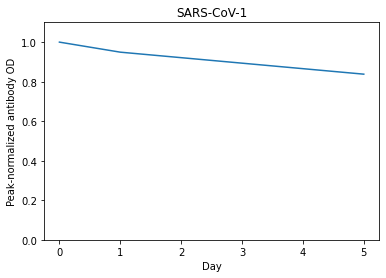

In [98]:
from matplotlib import pyplot as plt8
plt8.plot(sarscov2antibodytimecourse)
plt8.ylim(0,1.1)
plt8.xlabel("Day")
plt8.ylabel("Peak-normalized antibody OD")
plt8.title('SARS-CoV-1')
plt8.show()

In [99]:
df4 = pd.DataFrame(sarscov2antibodytimecourse, columns=["Antibody Time Course"])
df4.to_csv('SARS-CoV-2-Antibody-Time-Course' + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + '.csv', index=False)

In [100]:
sarscov2baseline = 0.1301183

##### This baseline peak-normalized IgG antibody level for SARS-CoV-2 comes from the ancestral and descendent states analysis that 
##### used the baselines for the human "seasonal" coronaviruses to estimate the baselines for the zoonotic coronaviruses.

In [101]:
sarscov2lsfuncwfixedbaseline = 0
currentMinValue = float('inf')
currentMinValue

for index in range(0, (len(sarscov2antibodytimecourse))):
    print(sarscov2antibodytimecourse[index] )
    ##Need to find the step value and maximum value for this lambdaValue
    lambdaValue = 0.002
    ##Added 11/28
    sarscov2lsfuncwfixedbaseline = (sarscov2antibodytimecourse[index]) - math.pow((calculatelambda(sarscov2baseline, lambdaValue, index)), 2) 
    print(sarscov2lsfuncwfixedbaseline)
    
    if sarscov2lsfuncwfixedbaseline < currentMinValue:
        currentMinValue = sarscov2lsfuncwfixedbaseline      

1.0
0.0
0.9492144923076923
-0.0473124788307735
0.9213862948218853
-0.07168060993751224
0.8935580973360783
-0.09606165358231744
0.8657298998502713
-0.12045556001656832
0.8379017023644643
-0.14486227968664767


In [102]:
print(currentMinValue)

-0.14486227968664767


##### This value of lambda goes into the ancestral and descendent states analysis estimating a and b for the zoonotic coronaviruses.

In [103]:
sarscov2halflife = np.log(2) / 0.003746311184177791 

In [104]:
print(sarscov2halflife)

185.02125063379415


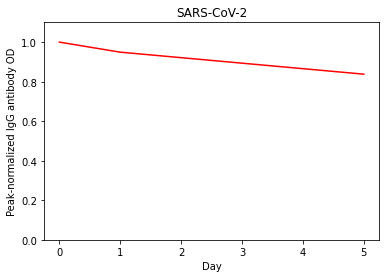

In [105]:
from matplotlib import pyplot as plt9
plt9.plot(sarscov2antibodytimecourse, color='red')
plt9.ylim(0,1.1)
plt9.xlabel("Day")
plt9.ylabel("Peak-normalized IgG antibody OD")
plt9.title('SARS-CoV-2')
plt9.show()

In [106]:
print(len(sarscov2antibodytimecourse))

6


In [107]:
sarscov2antibodytimecourseplusexp = sarscov2antibodytimecourse
day = len(sarscov2antibodytimecourse)

print(day)

6


In [108]:
#while day < 4393:
#Small file 86 records
#while day < 88:
maxDays = 6
while day < maxDays:
    day = day + 1
    print("day")
    print(day)
    exponentValueBaseLine = -0.003746311184177791
    tempValue = sarscov1baseline + (sarscov2antibodytimecourseplusexp[day-1] - sarscov1baseline) * math.exp(exponentValueBaseLine)
    print('tempValue')
    print(tempValue)
    sarscov2antibodytimecourseplusexp.append(tempValue)

In [109]:
print(sarscov2antibodytimecourseplusexp)

[1.0, 0.9492144923076923, 0.9213862948218853, 0.8935580973360783, 0.8657298998502713, 0.8379017023644643]


In [110]:
print(len(sarscov2antibodytimecourseplusexp))

6


Text(0.5, 1.0, 'SARS-CoV-2')

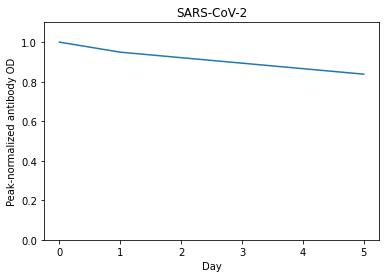

In [111]:
import matplotlib.pyplot as plt2
plt2.plot(sarscov2antibodytimecourseplusexp)
#f = plt2.figure()
plt2.ylim(0,1.1)
plt2.xlabel("Day")
plt2.ylabel("Peak-normalized antibody OD")
plt2.title('SARS-CoV-2')

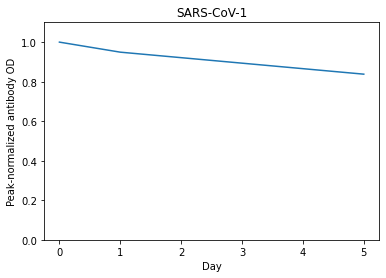

In [112]:
import matplotlib.pyplot as plt10

f = plt10.figure()
plt10.plot(sarscov2antibodytimecourseplusexp)

plt10.ylim(0,1.1)
plt10.xlabel("Day")
plt10.ylabel("Peak-normalized antibody OD")
plt10.title('SARS-CoV-1')
plt10.show()

f.savefig("SARS-CoV-2_nOD-by-Day" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')

##### SARS-CoV-2 Probability of Infection | Antibody OD

In [113]:
import math

def sarscov2probinfgivenaod(aod):
    exponentValue = 5.053901 + (12.64746 * aod)
    result = 1 / (1 + math.exp(exponentValue))
    return result

In [114]:
sarscov2probinfgivenaodList = list()

currentValue = 0;

while( currentValue <= 1):
    #This is the incremetal value for ploting only
    currentValue = currentValue + 0.00625
    sarscov2probinfgivenaodList.append(sarscov2probinfgivenaod(currentValue))

In [115]:
sarscov2probinfgivenaodList = list()

currentValue = 0;

while( currentValue <= 1):
    currentValue = currentValue + 0.00625
    sarscov2probinfgivenaodList.append(sarscov2probinfgivenaod(currentValue))

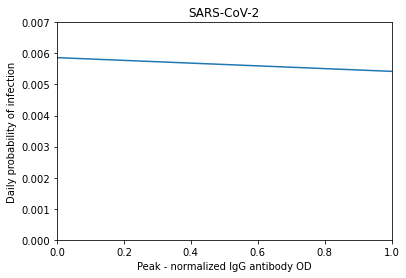

In [116]:
import matplotlib.pyplot as plt11

plt11.plot(sarscov2probinfgivenaodList)
plt11.ylim(0,0.007)
plt11.xlim(0.0, 1.0)
plt11.xlabel("Peak - normalized IgG antibody OD")
plt11.ylabel("Daily probability of infection")
plt11.title('SARS-CoV-2')
plt11.show()

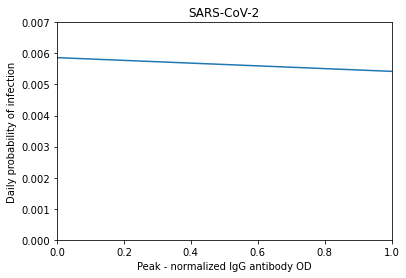

In [117]:
import matplotlib.pyplot as plt12

f12 = plt12.figure()
plt12.plot(sarscov2probinfgivenaodList)

plt12.ylim(0,0.007)
plt12.xlim(0.0, 1.0)
plt12.xlabel("Peak - normalized IgG antibody OD")
plt12.ylabel("Daily probability of infection")
plt12.title('SARS-CoV-2')
plt12.show()

f12.savefig("SARS-CoV-2_PrInf-by-nOD" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')

Text(0.5, 1.0, 'SARS-CoV-2')

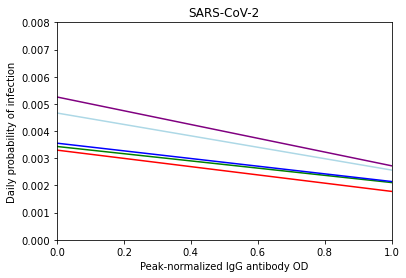

In [118]:
from matplotlib import pyplot as plt13

sarscov2probinfList1 = populatesarscov1probinfList(-4.997881, -11.099285)

plt13.plot(sarscov1probinfList1, color='red')
plt13.ylim(0,0.008)
plt13.xlim(0.0, 1.0)
plt13.xlabel("Peak-normalized IgG antibody OD")

sarscov2probinfList2 = populatesarscov1probinfList(-5.1806, -9.802874)
sarscov2probinfList3 = populatesarscov1probinfList(-4.76283, -12.00514)
sarscov2probinfList4 = populatesarscov1probinfList(-4.5831338, -13.20581)
sarscov2probinfList5 = populatesarscov1probinfList(-5.12873, -10.142186)

plt13.plot(sarscov2probinfList2, color = 'green')
plt13.plot(sarscov2probinfList3, color = 'lightblue')
plt13.plot(sarscov2probinfList4, color = 'purple')
plt13.plot(sarscov2probinfList5, color = 'blue')

plt13.ylabel("Daily probability of infection")
plt13.title('SARS-CoV-2')
#plt.show()

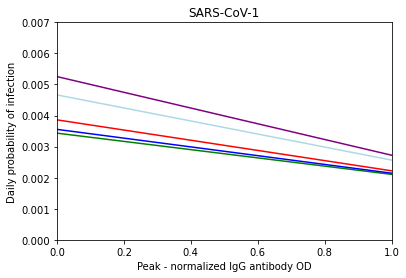

In [119]:
import matplotlib.pyplot as plt14

f14 = plt14.figure()
plt14.plot(sarscov2probinfList1, color='red')
plt14.plot(sarscov2probinfList2, color = 'green')
plt14.plot(sarscov2probinfList3, color = 'lightblue')
plt14.plot(sarscov2probinfList4, color = 'purple')
plt14.plot(sarscov2probinfList5, color = 'blue')

plt14.ylim(0,0.007)
plt14.xlim(0.0, 1.0)

plt14.xlabel("Peak - normalized IgG antibody OD")
plt14.ylabel("Daily probability of infection")
plt14.title('SARS-CoV-1')
plt14.show()

f14.savefig("SARS-CoV-2_PrInfs-by-nOD" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')

##### SARS-CoV-2 Probability of No Reinfection Time Course

In [120]:
sarscov2probnoreinfectiontimecourse = list()

day = 0
sarscov2probnoreinfectiontimecourse.append(1.0)

sarscov2probnoreinfectiontimecourse.append(sarscov2probnoreinfectiontimecourse[day] * (1-sarscov2probinfgivenaod(sarscov2antibodytimecourseplusexp[day+1])))

In [121]:
print(sarscov2probnoreinfectiontimecourse)

[1.0, 0.9999999609746094]


In [122]:
#### Need to change days to 4393
while day < 2:
    
    if(day < len(sarscov2antibodytimecourse)):
        sarscov2probnoreinfectiontimecourse.append(sarscov2probnoreinfectiontimecourse[day] * (1 - sarscov2probinfgivenaod(sarscov2antibodytimecourseplusexp[day + 1])))
    else:
        #sarscov2probnoreinfectiontimecourse.append(sarscov2probnoreinfectiontimecourse[day] * (1 - sarscov2probinfgivenaod(sarscov2antibodytimecourseplusexp[1392])))
        sarscov2probnoreinfectiontimecourse.append(sarscov2probnoreinfectiontimecourse[day] * (1 - sarscov2probinfgivenaod(sarscov2antibodytimecourseplusexp[1])))
            
    day = day + 1   

In [123]:
print(sarscov2probnoreinfectiontimecourse)

[1.0, 0.9999999609746094, 0.9999999609746094, 0.9999999054865177]


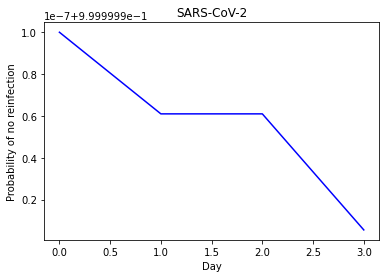

In [124]:
plt.plot(sarscov2probnoreinfectiontimecourse, color='blue')
#Limit not working
#plt.ylim(0,1.1)
plt.xlabel("Day")
plt.ylabel("Probability of no reinfection")
plt.title('SARS-CoV-2')
plt.show()

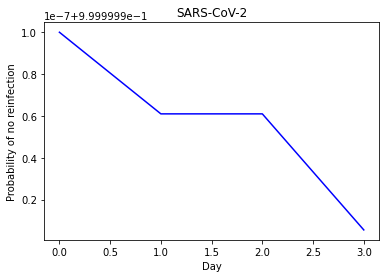

In [125]:
import matplotlib.pyplot as plt15

f15 = plt15.figure()
plt15.plot(sarscov2probnoreinfectiontimecourse, color = 'blue')

#plt6.ylim(0,0.007)
#plt6.xlim(0.0, 1.0)

plt15.xlabel("Day")
plt15.ylabel("Probability of no reinfection")
plt15.title('SARS-CoV-2')
plt15.show()

f15.savefig("SARS-CoV-2_PnorInfTimecourse-by-" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')

In [126]:
sarscov2probreinfection = list()
day = 0;

In [127]:
#while day < 4393:
while day < 85:
    day = day + 1  
        
    #if day < 1392:
    if day < 2:
        tempValue = sarscov2probinfgivenaod(sarscov2antibodytimecourseplusexp[day]) * sarscov2probnoreinfectiontimecourse[day]
    else:       
        #empValue = sarscov2probinfgivenaod(sarscov2antibodytimecourseplusexp[1392])  * sarscov2probnoreinfectiontimecourse[day]
        tempValue = sarscov2probinfgivenaod(sarscov2antibodytimecourseplusexp[1])  * sarscov2probnoreinfectiontimecourse[1]
    
    sarscov2probreinfection.append(tempValue)      

In [128]:
print(sarscov2probreinfection)

[3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.902538906605897e-08, 3.90253890

Text(0.5, 1.0, 'SARS-CoV-2')

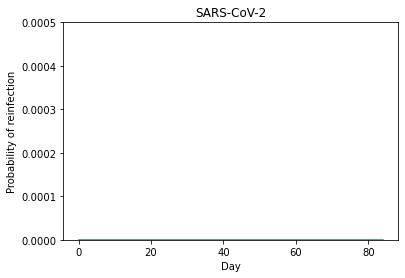

In [129]:
import matplotlib.pyplot as plt17
plt17.plot(sarscov2probreinfection)
plt17.ylim(0, 0.0005)
plt17.xlabel("Day")
plt17.ylabel("Probability of reinfection")
plt17.title('SARS-CoV-2') 

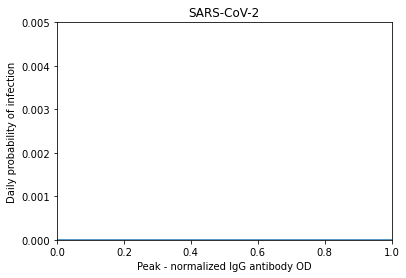

In [130]:
import matplotlib.pyplot as plt17

f17 = plt17.figure()
plt17.plot(sarscov2probreinfection)

plt17.ylim(0,0.005)
plt17.xlim(0.0, 1.0)
plt17.xlabel("Peak - normalized IgG antibody OD")
plt17.ylabel("Daily probability of infection")
plt17.title('SARS-CoV-2')
plt17.show()

f17.savefig("SARS-CoV-2_PrInf-by-nOD" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')